<a href="https://colab.research.google.com/github/rachit-shah/adbi-project/blob/master/ADBI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!cp gdrive/'My Drive'/bbc-fulltext.zip .
!cp gdrive/'My Drive'/glove.6B.zip .

In [3]:
!unzip bbc-fulltext.zip

Archive:  bbc-fulltext.zip
   creating: bbc/
   creating: bbc/business/
  inflating: bbc/business/001.txt    
  inflating: bbc/business/002.txt    
  inflating: bbc/business/003.txt    
  inflating: bbc/business/004.txt    
  inflating: bbc/business/005.txt    
  inflating: bbc/business/006.txt    
  inflating: bbc/business/007.txt    
  inflating: bbc/business/008.txt    
  inflating: bbc/business/009.txt    
  inflating: bbc/business/010.txt    
  inflating: bbc/business/011.txt    
  inflating: bbc/business/012.txt    
  inflating: bbc/business/013.txt    
  inflating: bbc/business/014.txt    
  inflating: bbc/business/015.txt    
  inflating: bbc/business/016.txt    
  inflating: bbc/business/017.txt    
  inflating: bbc/business/018.txt    
  inflating: bbc/business/019.txt    
  inflating: bbc/business/020.txt    
  inflating: bbc/business/021.txt    
  inflating: bbc/business/022.txt    
  inflating: bbc/business/023.txt    
  inflating: bbc/business/024.txt    
  inflating: bbc

In [0]:
!rm bbc/README.TXT

In [5]:
!ls bbc/entertainment/

001.txt  044.txt  087.txt  130.txt  173.txt  216.txt  259.txt  302.txt	345.txt
002.txt  045.txt  088.txt  131.txt  174.txt  217.txt  260.txt  303.txt	346.txt
003.txt  046.txt  089.txt  132.txt  175.txt  218.txt  261.txt  304.txt	347.txt
004.txt  047.txt  090.txt  133.txt  176.txt  219.txt  262.txt  305.txt	348.txt
005.txt  048.txt  091.txt  134.txt  177.txt  220.txt  263.txt  306.txt	349.txt
006.txt  049.txt  092.txt  135.txt  178.txt  221.txt  264.txt  307.txt	350.txt
007.txt  050.txt  093.txt  136.txt  179.txt  222.txt  265.txt  308.txt	351.txt
008.txt  051.txt  094.txt  137.txt  180.txt  223.txt  266.txt  309.txt	352.txt
009.txt  052.txt  095.txt  138.txt  181.txt  224.txt  267.txt  310.txt	353.txt
010.txt  053.txt  096.txt  139.txt  182.txt  225.txt  268.txt  311.txt	354.txt
011.txt  054.txt  097.txt  140.txt  183.txt  226.txt  269.txt  312.txt	355.txt
012.txt  055.txt  098.txt  141.txt  184.txt  227.txt  270.txt  313.txt	356.txt
013.txt  056.txt  099.txt  142.txt  185.txt  228.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [7]:
!unzip glove.6B.zip
!ls

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
bbc		  glove.6B.100d.txt  glove.6B.50d.txt
bbc-fulltext.zip  glove.6B.200d.txt  glove.6B.zip
gdrive		  glove.6B.300d.txt  sample_data


In [3]:
#Read Data
categories = ['business','entertainment','politics','sport','tech']
df = pd.DataFrame([],columns=['category','id','text'])
for cat in categories:
  for file in os.listdir("bbc/"+cat):
      if file.endswith(".txt"):
          filepath = os.path.join("bbc/"+cat, file)
          text = open(filepath,'r', errors='ignore').read()
          s = pd.Series([cat,int(filepath.split('/')[-1][:-4]),text],index=['category','id','text'])
          df = df.append(s,ignore_index=True)

df.head()
          
      


,category,id,text
0,business,386,Krispy Kreme shares hit\n\nShares in Krispy Kr...
1,business,190,Consumers drive French economy\n\nFrance's eco...
2,business,439,"German economy rebounds\n\nGermany's economy, ..."
3,business,454,LSE doubts boost bidders' shares\n\nShares in ...
4,business,302,Cactus diet deal for Phytopharm\n\nA slimming ...


In [46]:
'''
#WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text 
from wordcloud import WordCloud, STOPWORDS
cat = df['category'].unique()

for i in range(0,len(cat)):
    words = ' '.join(df.loc[df['category']==cat[i], 'text'])

    wordcloud = WordCloud( 
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=800,
                          height=400
                ).generate(words)
    print(cat[i])
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

words = ' '.join(df.loc[:, 'text'])

wordcloud = WordCloud( 
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=800,
                      height=400
            ).generate(words)
print("ALL Categories:")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
'''

'\n#WordCloud\n\nfrom wordcloud import WordCloud\nimport matplotlib.pyplot as plt\nfrom sklearn.feature_extraction import text \nfrom wordcloud import WordCloud, STOPWORDS\ncat = df[\'category\'].unique()\n\nfor i in range(0,len(cat)):\n    words = \' \'.join(df.loc[df[\'category\']==cat[i], \'text\'])\n\n    wordcloud = WordCloud( \n                          stopwords=STOPWORDS,\n                          background_color=\'white\',\n                          width=800,\n                          height=400\n                ).generate(words)\n    print(cat[i])\n    plt.figure(figsize=(10, 5))\n    plt.imshow(wordcloud)\n    plt.axis(\'off\')\n    plt.show()\n\nwords = \' \'.join(df.loc[:, \'text\'])\n\nwordcloud = WordCloud( \n                      stopwords=STOPWORDS,\n                      background_color=\'white\',\n                      width=800,\n                      height=400\n            ).generate(words)\nprint("ALL Categories:")\nplt.figure(figsize=(10, 5))\nplt.imshow(wo

## Label Encoder
#### Use inverse_transform at the end after predicting

In [4]:
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
y = df['category']
X = df.drop(['category','id'],axis=1)
X_train, X_test, y_train, y_test  = train_test_split(X,y,stratify=y, test_size=0.2, random_state=123)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

print('before: %s ...' %y_train[:5])

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

print('after: %s ...' %y_train)

before: 1508       sport
1908        tech
2104        tech
2019        tech
1245    politics
Name: category, dtype: object ...
after: [3 4 4 ... 1 0 2] ...


In [5]:
print(np.bincount(y_train))
print(y.value_counts())

print(le.inverse_transform([i for i in range(5)]))

[408 309 333 409 321]
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64
['business' 'entertainment' 'politics' 'sport' 'tech']


In [0]:
import string
from nltk.corpus import stopwords
import re
from nltk.stem.snowball import SnowballStemmer

def preprocess(texts):
  def clean_text(text):
    text = text.replace("\n"," ")
    text = text.translate(string.punctuation)
    text = text.lower().split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    text = " ".join(text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"-"," ",text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r"\s{2,}", " ", text)
    #print(text)
    
    '''
    ## Stemming
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    '''

    return text
  texts = texts.map(lambda x: clean_text(x))
  return texts

In [36]:
texts = preprocess(X_train['text']).tolist()
texts

['woodward eyes brennan lions toulouse former irish international trevor brennan could one clive woodward many surprises 44 man lions tour squad announced brennan last played ireland samoa 2001 held high esteem former england coach if speak players there huge amount respect guy woodward told sunday independent players tend know better coaches irish welsh english players well 31 year old former dublin milkman moved leinster toulouse 2003 immediately picked heineken cup winner medal all french final perpignan lansdowne road brennan highly rated stade toulousain used anywhere back five woodward ensuring preparations trip new zealand june thorough possible i have spoken quite players probably know they are actually saying we are conversations told newspaper but talk certain players they will say think they are scratch want team heard bad word said trevor which considering pretty tough guy reputation is me impressive ',
 'napster offers rented music music downloading rejected free peer peer

In [73]:
from collections import defaultdict
c = defaultdict(int)
for x in texts:
  for w in x.split():
    c[w] += 1

D = {}
for k,v in c.items():
  if v>1:
    D[k]=v
print(len(D))

17589


In [74]:
MAX_SEQUENCE_LENGTH = 500
MAX_NB_WORDS = 25000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
embeddings_index = {}
with open('glove.6B.100d.txt') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


{'boxes': [<matplotlib.lines.Line2D at 0x7fde47d94940>],
 'caps': [<matplotlib.lines.Line2D at 0x7fde47d83780>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fde47d83b00>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fde47d83208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fde47d94198>,
  <matplotlib.lines.Line2D at 0x7fde47d94f98>]}

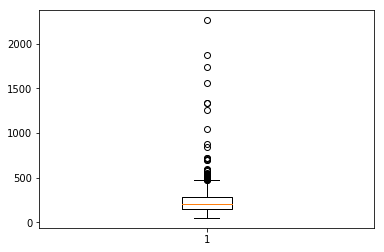

In [60]:
ma = 0
ls = []
for x in texts:
  ls.append(len(x.split()))

plt.boxplot(ls)



In [87]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten
from keras.models import Model
from keras.initializers import Constant

tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(y_train))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

xtrain = data[:-nb_validation_samples]
ytrain = labels[:-nb_validation_samples]
xval = data[-nb_validation_samples:]
yval = labels[-nb_validation_samples:]

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 27081 unique tokens.
Shape of data tensor: (1780, 500)
Shape of label tensor: (1780, 5)


In [0]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [89]:
embedding_matrix.shape

(27082, 100)

In [0]:
from keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [91]:
labels_index = {}
for i in range(5):
  name = le.inverse_transform([i])[0]
  labels_index[name] = i
labels_index

{'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}

In [92]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Dropout(0.5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Dropout(0.5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)  # global max pooling
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
preds = Dense(len(labels_index), activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

# happy learning!
model.fit(xtrain, ytrain, validation_data=(xval, yval),
          epochs=10, batch_size=128)

Train on 1424 samples, validate on 356 samples
Epoch 1/10
1424/1424 [==============================] - 8s 6ms/step - loss: 2.6094 - acc: 0.2472 - val_loss: 1.5417 - val_acc: 0.3146
Epoch 2/10
1424/1424 [==============================] - 8s 6ms/step - loss: 1.4827 - acc: 0.3834 - val_loss: 1.2259 - val_acc: 0.7556
Epoch 3/10
1424/1424 [==============================] - 8s 6ms/step - loss: 1.0955 - acc: 0.5801 - val_loss: 0.6983 - val_acc: 0.8343
Epoch 4/10
1424/1424 [==============================] - 8s 6ms/step - loss: 0.7102 - acc: 0.7388 - val_loss: 0.4757 - val_acc: 0.8455
Epoch 5/10
1424/1424 [==============================] - 8s 6ms/step - loss: 0.4320 - acc: 0.8448 - val_loss: 0.3264 - val_acc: 0.9017
Epoch 6/10
1424/1424 [==============================] - 8s 6ms/step - loss: 0.4142 - acc: 0.8638 - val_loss: 0.4281 - val_acc: 0.8511
Epoch 7/10
1424/1424 [==============================] - 8s 6ms/step - loss: 0.4070 - acc: 0.8729 - val_loss: 0.1564 - val_acc: 0.9410
Epoch 8/10
1424

In [93]:
test_text = preprocess(X_test['text']).tolist()
#tokenizer2 = Tokenizer(nb_words=MAX_NB_WORDS)
#tokenizer2.fit_on_texts(test_text)
sequences = tokenizer.texts_to_sequences(test_text)

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
prediction = model.predict(data)
prediction

Shape of data tensor: (445, 500)
Shape of label tensor: (1780, 5)


array([[9.9538898e-01, 2.4198390e-04, 3.7435852e-03, 2.3177301e-04,
        3.9372637e-04],
       [9.1695562e-03, 1.9294373e-04, 9.8984760e-01, 6.0307281e-04,
        1.8676794e-04],
       [8.0612472e-06, 9.9980158e-01, 8.5364205e-05, 1.0714919e-05,
        9.4258976e-05],
       ...,
       [8.2933351e-02, 1.1258312e-03, 9.1096675e-01, 2.1940379e-03,
        2.7800407e-03],
       [9.9951005e-01, 2.2521619e-06, 4.6451751e-04, 1.0371926e-05,
        1.2775316e-05],
       [1.1592980e-02, 1.1140856e-04, 9.8789352e-01, 2.9927859e-04,
        1.0284690e-04]], dtype=float32)

In [0]:
y_test = y_test.reset_index(drop=True)

In [97]:
prediction[20]

array([6.1590684e-04, 4.3992601e-05, 1.9590519e-04, 2.7796038e-06,
       9.9914134e-01], dtype=float32)

In [100]:
count = 0
t = 0
for pred in prediction:
  p = pred.argmax()
  name = le.inverse_transform([p])
  if name == y_test.loc[count]:
    t+=1
  count+=1
    
print("Test Accuracy:",t/count)

Test Accuracy: 0.9595505617977528
